In [ ]:
!pip install -q hvplot

     |████████████████████████████████| 3.1 MB 16.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import xgboost as xgb
from time import time
import hvplot.pandas

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
#from catboost import CatBoostRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv', parse_dates = ['Datetime'])
test = pd.read_csv('test.csv', parse_dates = ['Datetime'])
train = train.drop(columns=['ID'])
train['Datetime_day'] = train.Datetime.dt.day

# month
train['Datetime_month'] = train.Datetime.dt.month
 
# year
train['Datetime_year'] = train.Datetime.dt.year

# hour
train['Datetime_hour'] = train.Datetime.dt.hour
train = train.drop(columns=['Datetime'])
#train = train.dropna()
train = train.fillna(0)
X_train = train[["Sensor1_PM2.5","Sensor2_PM2.5","Temperature","Relative_Humidity","Datetime_day","Datetime_month","Datetime_year","Datetime_hour"]]
y_train = train["Offset_fault"]
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
train = pd.concat([X_train_res, y_train_res], axis=1, join='inner')
display(train)

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour,Offset_fault
0,52.580000,49.520000,17.4,96.0,3,11,2021,4,0
1,35.250000,33.400000,25.0,75.0,8,11,2021,18,0
2,19.180000,23.500000,24.9,75.0,7,11,2021,9,0
3,19.400000,15.480000,24.9,70.0,1,1,2022,18,0
4,38.300000,34.770000,20.9,89.0,5,11,2021,22,0
...,...,...,...,...,...,...,...,...,...
373801,10.825430,7.002539,24.2,85.0,29,12,2021,10,1
373802,65.391031,51.282577,23.4,71.0,6,1,2022,9,1
373803,40.596045,34.221132,23.0,89.0,25,12,2021,17,1
373804,38.561440,33.619528,22.4,86.0,16,11,2021,20,1


In [ ]:
test['Datetime_day'] = test.Datetime.dt.day
test['Datetime_month'] = test.Datetime.dt.month
test['Datetime_year'] = test.Datetime.dt.year
test['Datetime_hour'] = test.Datetime.dt.hour


train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',	'Datetime_day','Datetime_month',	'Datetime_year', 'Datetime_hour']


test_df = test[['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',	'Datetime_day','Datetime_month',	'Datetime_year', 'Datetime_hour']]

#test_df = test_df.dropna()

"""test_df = test_df.apply(pd.to_numeric, errors='coerce')
# Take Mean
test_df  = test_df.fillna(test_df .mean())"""

test_df = test_df.fillna(0)

"test_df = test_df.apply(pd.to_numeric, errors='coerce')\n# Take Mean\ntest_df  = test_df.fillna(test_df .mean())"

In [ ]:
test_df

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,90.75,114.78,22.2,56.0,28,1,2022,8
1,56.03,52.18,0.0,0.0,16,2,2022,21
2,387.35,346.73,28.1,63.0,24,1,2022,17
3,63.17,83.85,21.6,82.0,31,1,2022,7
4,69.23,53.07,22.7,80.0,31,1,2022,0
...,...,...,...,...,...,...,...,...
127356,33.65,42.23,0.0,0.0,13,2,2022,0
127357,21.23,15.72,0.0,0.0,9,3,2022,16
127358,41.45,47.25,0.0,0.0,18,2,2022,14
127359,28.60,27.27,0.0,0.0,11,3,2022,19


In [ ]:
X = train.iloc[:, :-1].values    #   X -> Feature Variables
y = train.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
"""pip install catboost"""

'pip install catboost'

In [ ]:
"""X = train.drop('Offset_fault',axis=1)"""

"X = train.drop('Offset_fault',axis=1)"

In [ ]:
#X = train.iloc[:, :-1]
"""cate_features_index = np.where(X.dtypes != float)[0]"""

'cate_features_index = np.where(X.dtypes != float)[0]'

In [ ]:
"""cate_features_index"""

'cate_features_index'

In [ ]:
"""from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor"""

'from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor'

In [ ]:
"""model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)"""

"model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)"

In [ ]:
"""X.dtypes"""

'X.dtypes'

In [ ]:
"""model.fit(X_train,y_train,eval_set=(X_test,y_test))"""

'model.fit(X_train,y_train,eval_set=(X_test,y_test))'

In [ ]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [ ]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [ ]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=1000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, subsample=0.855)

In [ ]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [ ]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.982077
[200]	valid's auc: 0.985776
[300]	valid's auc: 0.98743
[400]	valid's auc: 0.988581
[500]	valid's auc: 0.989444
[600]	valid's auc: 0.990093
[700]	valid's auc: 0.990597
[800]	valid's auc: 0.991016
[900]	valid's auc: 0.991391
[1000]	valid's auc: 0.991687
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.991687
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.982116
[200]	valid's auc: 0.985763
[300]	valid's auc: 0.987453
[400]	valid's auc: 0.988629
[500]	valid's auc: 0.989456
[600]	valid's auc: 0.99014
[700]	valid's auc: 0.99067
[800]	valid's auc: 0.991055
[900]	valid's auc: 0.991449
[1000]	valid's auc: 0.991776
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.991776
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.982178
[200]	valid's

GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.9234, metric='None',
                                      min_child_samples=399,
                                      min_child_weight=0.1, n_estimators=1000,
                                      n_jobs=4, num_leaves=13, random_state=314,
                                      reg_alpha=2, reg_lambda=5,
                                      subsample=0.855),
             param_grid={'scale_pos_weight': [1, 2, 6, 12]}, scoring='roc_auc',
             verbose=True)

Best score reached: 0.9921397475269049 with params: {'scale_pos_weight': 1} 


In [ ]:
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=1000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, subsample=0.855)

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.980707
[200]	valid's auc: 0.983756
[300]	valid's auc: 0.984669
[400]	valid's auc: 0.985177
[500]	valid's auc: 0.985458
[600]	valid's auc: 0.985633
[700]	valid's auc: 0.985722
[800]	valid's auc: 0.985776
[900]	valid's auc: 0.98581
[1000]	valid's auc: 0.985832
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.985832


LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=1000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, subsample=0.855)

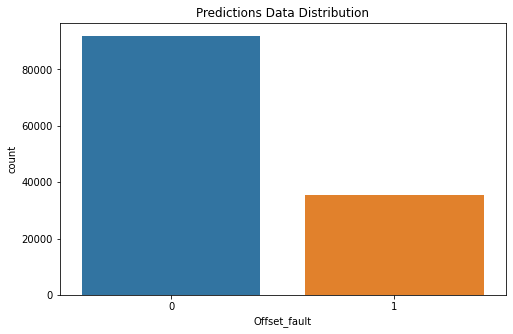

In [ ]:
predictions = clf_final.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [ ]:
sub_file.to_csv('submit.csv', index = False)